# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [2]:
try :
  HeartDiseaseData = pd.read_csv("heart_2020_cleaned.csv")
  print(f"Data Shape is : {HeartDiseaseData.shape}")
except BaseException as err :
  print(f"Error Msg is : {err}")

Data Shape is : (319795, 18)


# Information From The Data

In [3]:
print('Head of data : \n')
HeartDiseaseData.head()  

Head of data : 



,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
print('Dtypes of data : \n') 
HeartDiseaseData.dtypes

Dtypes of data : 



HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [5]:
print('Info of data : \n') 
HeartDiseaseData.info()

Info of data : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  Kid

In [6]:
print('Sum of nulls in data :')
HeartDiseaseData.isnull().sum()

Sum of nulls in data :


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
#create DataFrame and drop raws with at least one NaN Values
#use dropna to delete raws with nulls
HeartDataFrame = pd.DataFrame(HeartDiseaseData).dropna()
#Checking the size of data again
print(f"The new size of the Data is : {HeartDataFrame.shape}")

for column in HeartDataFrame :
  # Get unique values for every column
  unique_value = np.unique(HeartDataFrame[column])
  # Count unique values for every column
  count_uniq_vals = len(unique_value)
  if count_uniq_vals < 15 :
    print(f"The number of values for feature {column} is : {count_uniq_vals} --> {unique_value}")
  else :
     print(f"The number of values for feature {column} is : {count_uniq_vals}")

The new size of the Data is : (319795, 18)
The number of values for feature HeartDisease is : 2 --> ['No' 'Yes']
The number of values for feature BMI is : 3604
The number of values for feature Smoking is : 2 --> ['No' 'Yes']
The number of values for feature AlcoholDrinking is : 2 --> ['No' 'Yes']
The number of values for feature Stroke is : 2 --> ['No' 'Yes']
The number of values for feature PhysicalHealth is : 31
The number of values for feature MentalHealth is : 31
The number of values for feature DiffWalking is : 2 --> ['No' 'Yes']
The number of values for feature Sex is : 2 --> ['Female' 'Male']
The number of values for feature AgeCategory is : 13 --> ['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80 or older']
The number of values for feature Race is : 6 --> ['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
The number of values for feature Diabetic is : 4 --> ['No' 'No, borderline diabetes' 'Yes' 'Yes

In [13]:
def AlcoholDrinking() :
    Num_of_HeartDisease_Cohol = 0
    Num_of_HeartDisease_Cohol_not = 0
    for Disease, Alcohol in zip(HeartDataFrame['HeartDisease'], HeartDataFrame['AlcoholDrinking']) :
        if Disease == Alcohol == 'Yes' :
            Num_of_HeartDisease_Cohol += 1
        elif Disease == Alcohol == 'No' :
            Num_of_HeartDisease_Cohol_not += 1
    Num_of_HeartDisease_Cohol_Percentage = round(Num_of_HeartDisease_Cohol/HeartDiseaseData.shape[0], 6)*100
    print(f"Alcohol Drinkers who has heartdisease Percentage : {Num_of_HeartDisease_Cohol_Percentage}%")   
    print(f"Number of Alcohol Drinkers who has heartdisease : {Num_of_HeartDisease_Cohol}")
    print(f"Number of Alcohol Drinkers who hasn't heartdisease : {Num_of_HeartDisease_Cohol}")
AlcoholDrinking()



Alcohol Drinkers who has heartdisease Percentage : 0.3568%
Number of Alcohol Drinkers who has heartdisease : 1141
Number of Alcohol Drinkers who hasn't heartdisease : 1141


In [14]:
def Smoking() :
    Num_of_Smoking = 0
    Num_of_Somking_not = 0
    for Disease, Smoke in zip(HeartDataFrame['HeartDisease'], HeartDataFrame['Smoking']) :
        if Disease == Smoke == 'Yes' :
            Num_of_Smoking += 1
        elif Disease == Smoke == 'No' :
            Num_of_Somking_not += 1
    
    print(f"Smoking Persons who has HeartDisease : {Num_of_Smoking}")   
    
    print(f"Number of smoking persons who hasn't heartdisease : {Num_of_Somking_not}")
Smoking()

Smoking Persons who has HeartDisease : 16037
Number of smoking persons who hasn't heartdisease : 176551


In [22]:
male = 0
female = 0
for gender in HeartDataFrame['Sex'] :
    if gender == 'Male' :
        male += 1
    elif gender == 'Female' :
        female += 1
print("Number of males in the data:", male)
print("Number of females in the data", female)

def Sex() :
    male = 0
    female= 0
    male_Disease_not = 0
    female_Disease_not= 0
    for Disease, sex in zip(HeartDataFrame['HeartDisease'],HeartDataFrame['Sex']) :
        if Disease == 'Yes' and sex == 'Male' :
            male += 1
        elif Disease == 'Yes' and sex == 'Female' :
            female += 1
        elif Disease == 'No' and sex == 'Male' :
            male_Disease_not += 1
        elif Disease == 'No' and sex == 'Female' :
            female_Disease_not += 1
    print(f"Number of Males who has HeartDisease : {male}")
    print(f"Number of Females who has HeartDisease : {female}")
    print(f"Number of Males who hasn't HeartDisease : {male_Disease_not}")
    print(f"Number of Females who hasn't HeartDisease : {female_Disease_not}")
Sex()

Number of males in the data: 151990
Number of females in the data 167805
Number of Males who has HeartDisease : 16139
Number of Females who has HeartDisease : 11234
Number of Males who hasn't HeartDisease : 135851
Number of Females who hasn't HeartDisease : 156571


In [23]:
# Check counts of every heartdisease in AgeCategory
AgeCategoryCounts = {}
for Disease, Age in zip(HeartDataFrame['HeartDisease'],HeartDataFrame['AgeCategory']) :
    if Disease == 'Yes' :
        AgeCategoryCounts[Age] = AgeCategoryCounts.get(Age, 0) + 1

print(f"Counts of HeartDisease for every AgeCategory : {sorted(AgeCategoryCounts.items())}")

Counts of HeartDisease for every AgeCategory : [('18-24', 130), ('25-29', 133), ('30-34', 226), ('35-39', 296), ('40-44', 486), ('45-49', 744), ('50-54', 1383), ('55-59', 2202), ('60-64', 3327), ('65-69', 4101), ('70-74', 4847), ('75-79', 4049), ('80 or older', 5449)]


In [25]:
# List comprehensive examples
list = [i for i in HeartDataFrame['PhysicalHealth'] if i % 2 == 0]
print(list)
print(len(list))

list = [i for i in HeartDataFrame['PhysicalHealth'] if i % 2 != 0]
print(list)
print(len(list))

list = [i for i in HeartDataFrame['SleepTime'] if i >= 10]
print(list)
print(len(list))

[0.0, 20.0, 0.0, 28.0, 6.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 30.0, 0.0, 4.0, 30.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 30.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 14.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 30.0, 0.0, 30.0, 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 8.0, 30.0, 0.0, 0.0, 0.0, 30.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 30.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 20.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 30.0, 0.0, 2.0, 2.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 10.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 10.0, 14.0, 20.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 20.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [26]:
list = []
listi = []
for persons in HeartDataFrame['Smoking'] :
    if persons == 'Yes' :
        list.append(persons)
    elif persons == 'No' :
        listi.append(persons)
print(list)
print(len(list))
print(listi)
print(len(listi))

['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'

In [27]:
class HeartDisease :
    def __init__(self) :
        self.Kidney_Disease = 0
        self.Kidney_Disease_not = 0
        self.skin_cancer = 0
        self.skin_cancer_not = 0
    def KidneyDisease(self) :
        for Disease, KidneyDisease in zip(HeartDataFrame['HeartDisease'], HeartDataFrame['KidneyDisease']) :
            if Disease == KidneyDisease =='Yes' :
                self.Kidney_Disease += 1
            elif Disease == KidneyDisease == 'No' :
                self.Kidney_Disease_not += 1
        print(f"Number of persons who has heartdisease and kidneydisease : {self.Kidney_Disease}")
        print(f"Number of persons who hasn't heartdisease and kidneydisease : {self.Kidney_Disease_not}")
    def SkinCancer(self) :
        for Disease, SkinCancer in zip(HeartDataFrame['HeartDisease'], HeartDataFrame['SkinCancer']) :
            if Disease == SkinCancer == 'Yes' :
                self.skin_cancer += 1
            elif Disease == SkinCancer == 'No' :
                self.skin_cancer_not += 1
        print(f"Number of persons who has heartdisease and skincancer : {self.skin_cancer}")
        print(f"Number of persons who hasn't heartdisease and skincancer : {self.skin_cancer_not}") 
Heart = HeartDisease()       

In [29]:
Heart.KidneyDisease()

Number of persons who has heartdisease and kidneydisease : 3455
Number of persons who hasn't heartdisease and kidneydisease : 284098


In [30]:
Heart.SkinCancer()

Number of persons who has heartdisease and skincancer : 4980
Number of persons who hasn't heartdisease and skincancer : 267583


In [31]:
# list to count number of people whos have Asthma
list1 = []
list2 = []
for characters in HeartDataFrame['Asthma'] :
    if characters == 'Yes' :
        list1.append(characters)
    elif characters == 'No' :
        list2.append(characters)
print(f"Number of persons who have Asthma : {len(list1)}")
print(f"Number of persons who haven't Asthma : {len(list2)}")

Number of persons who have Asthma : 42872
Number of persons who haven't Asthma : 276923


# Visualization

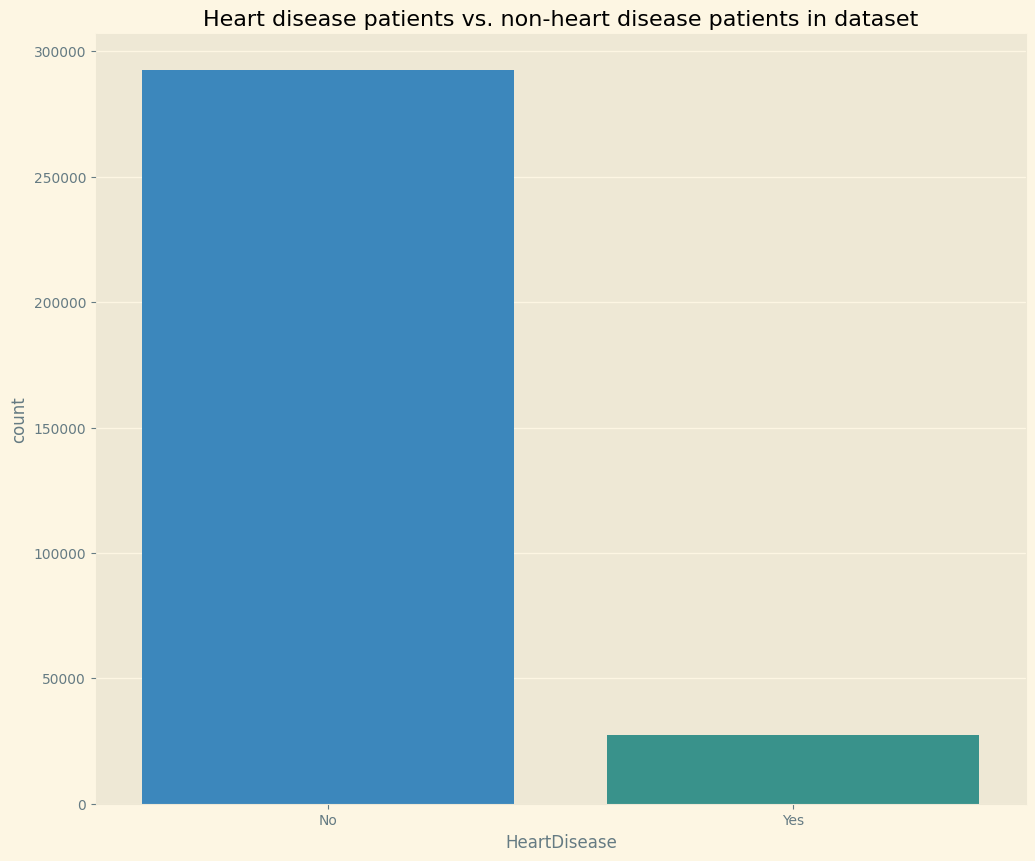

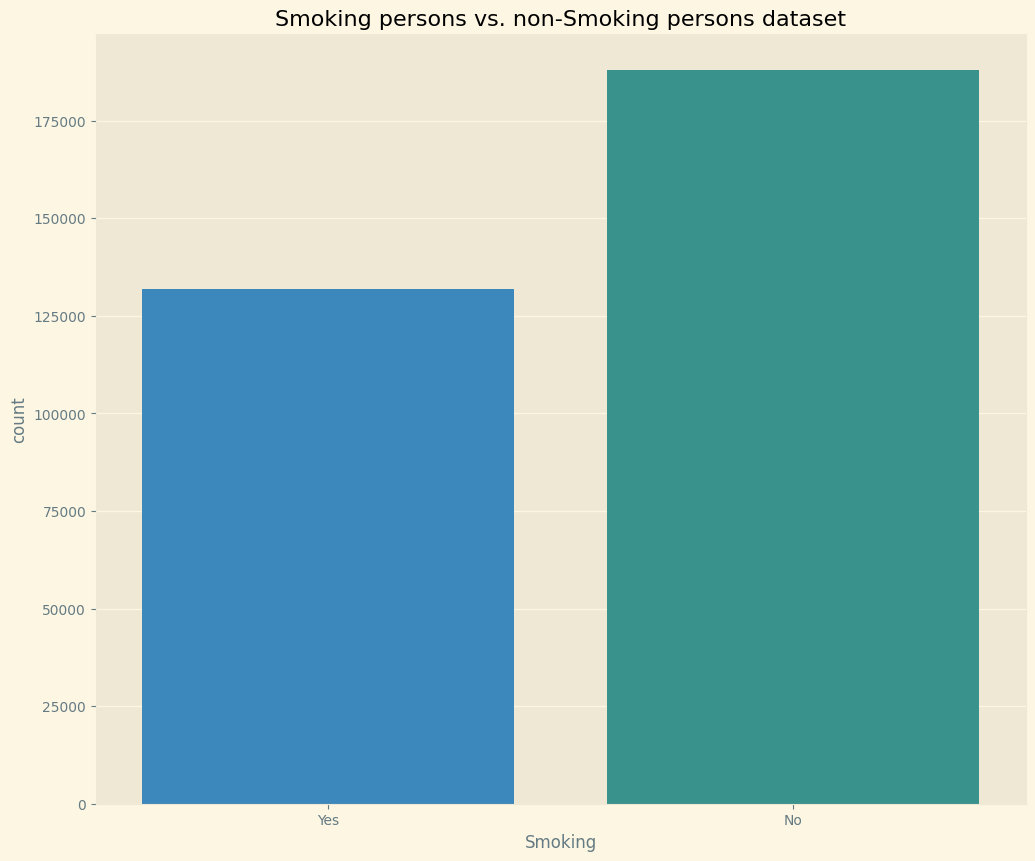

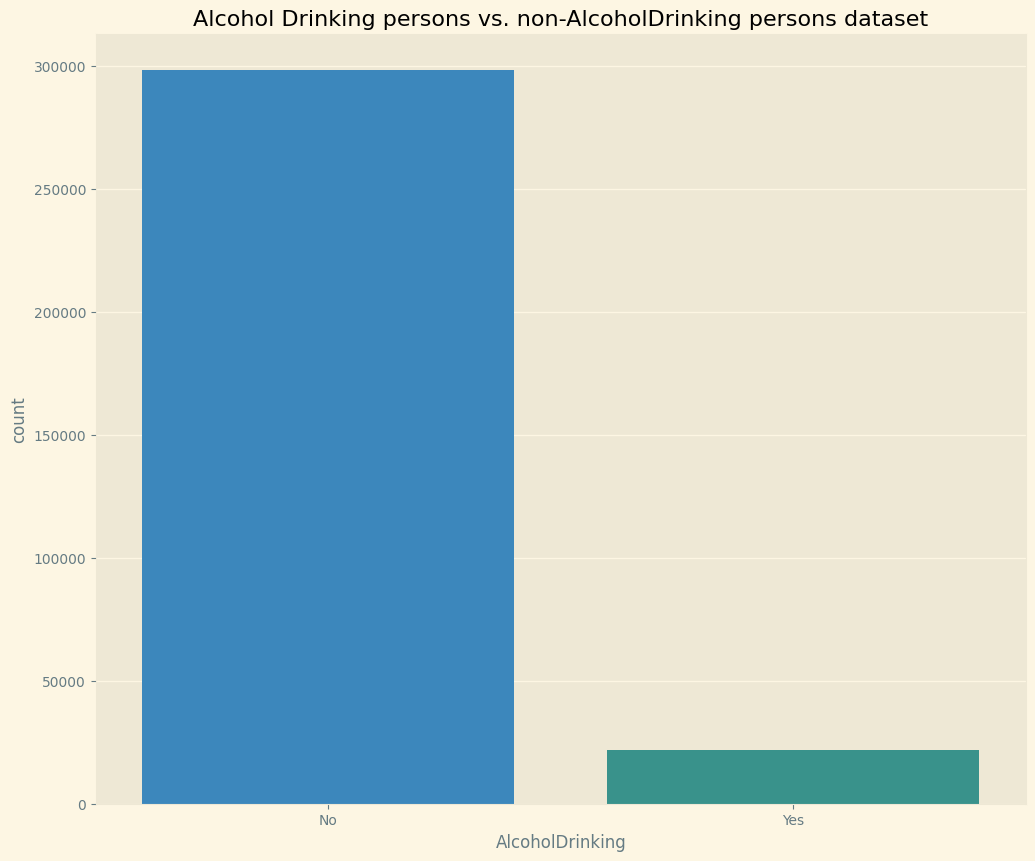

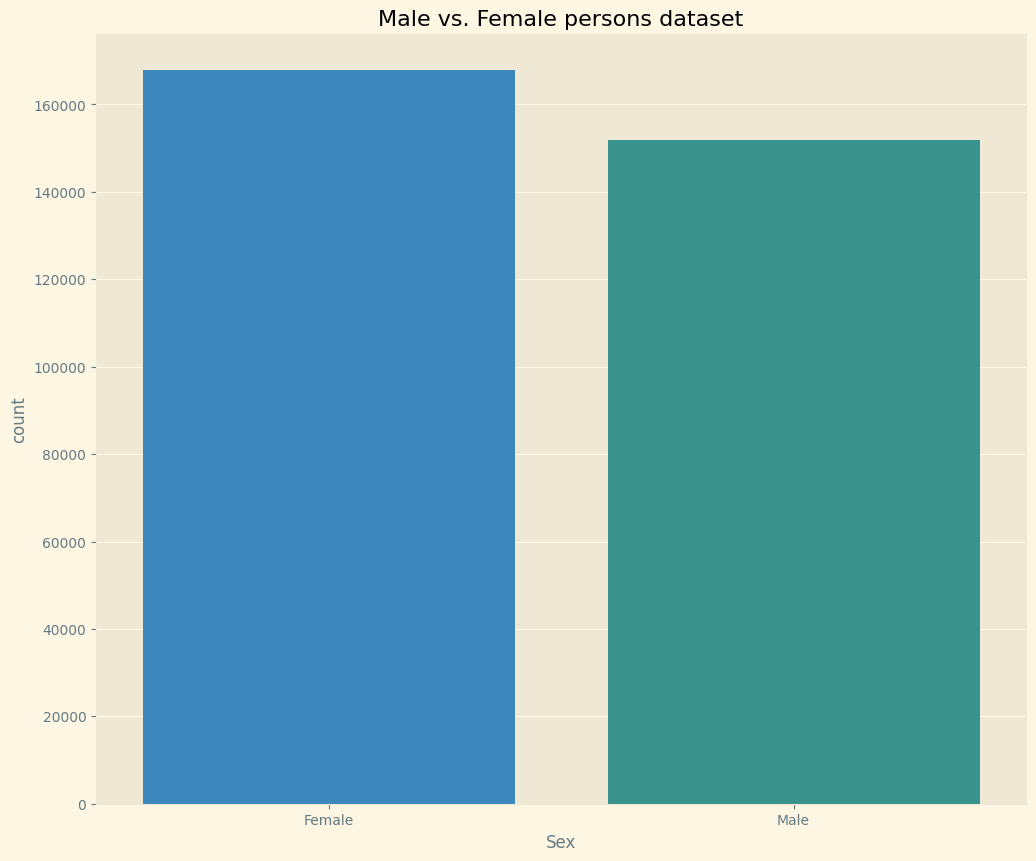

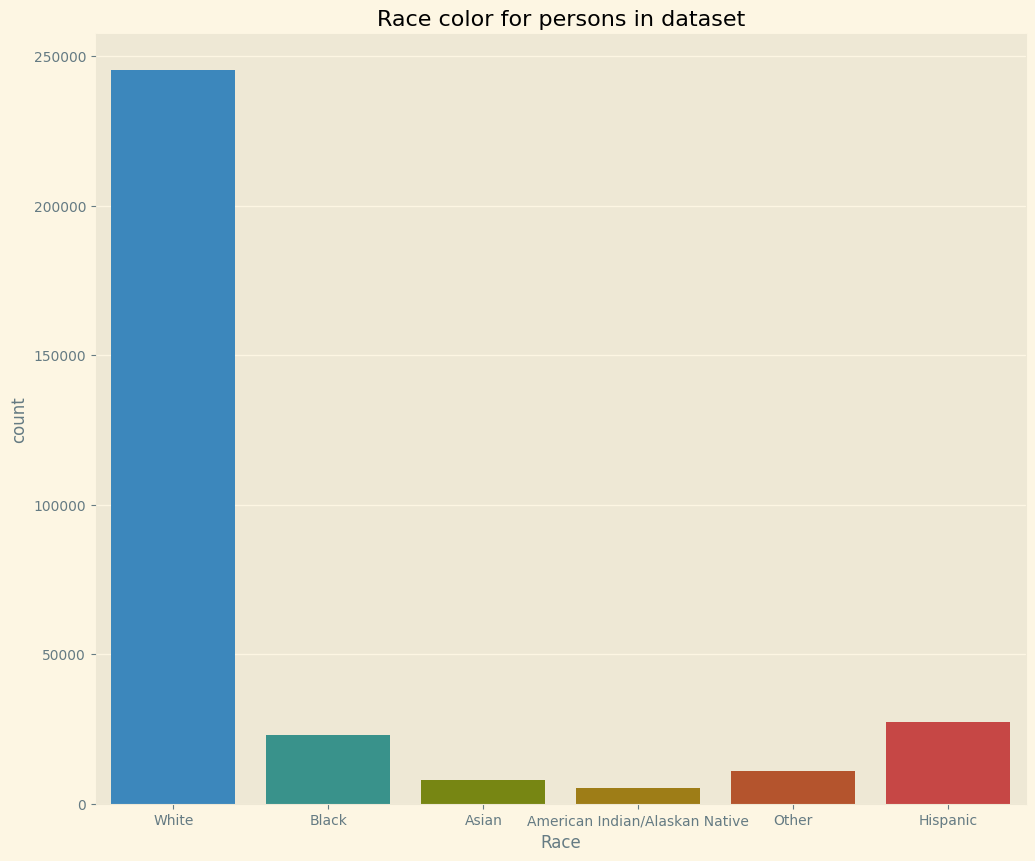

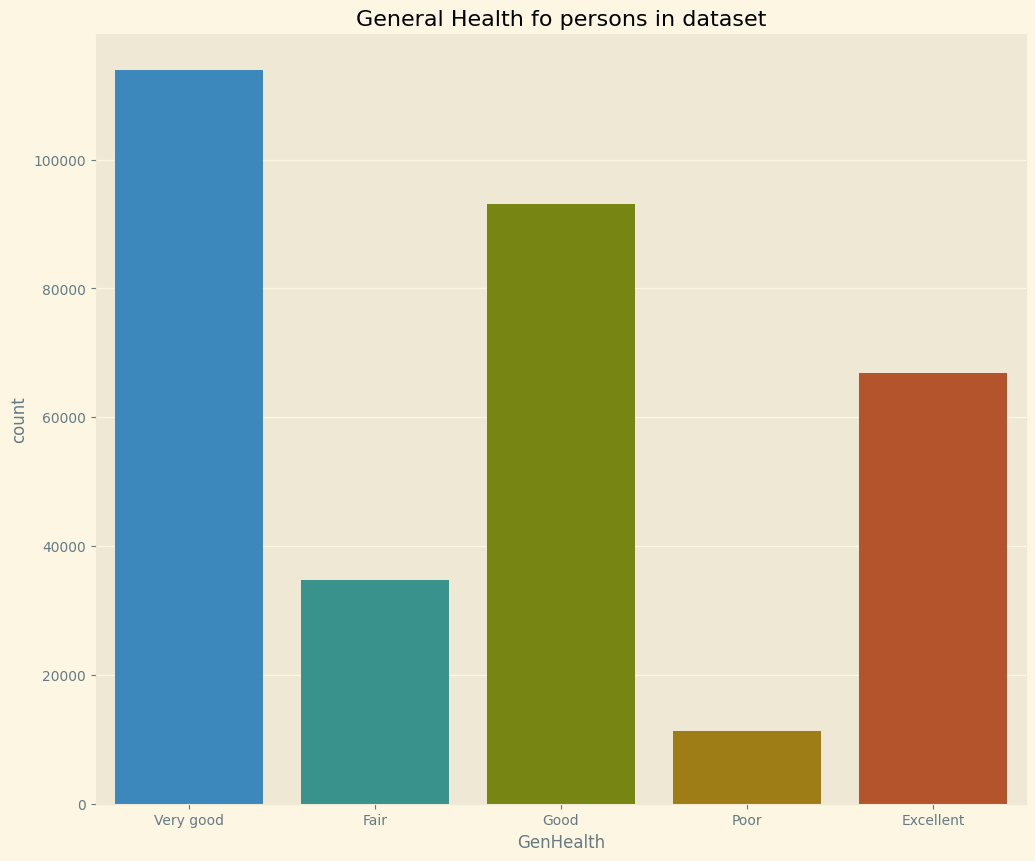

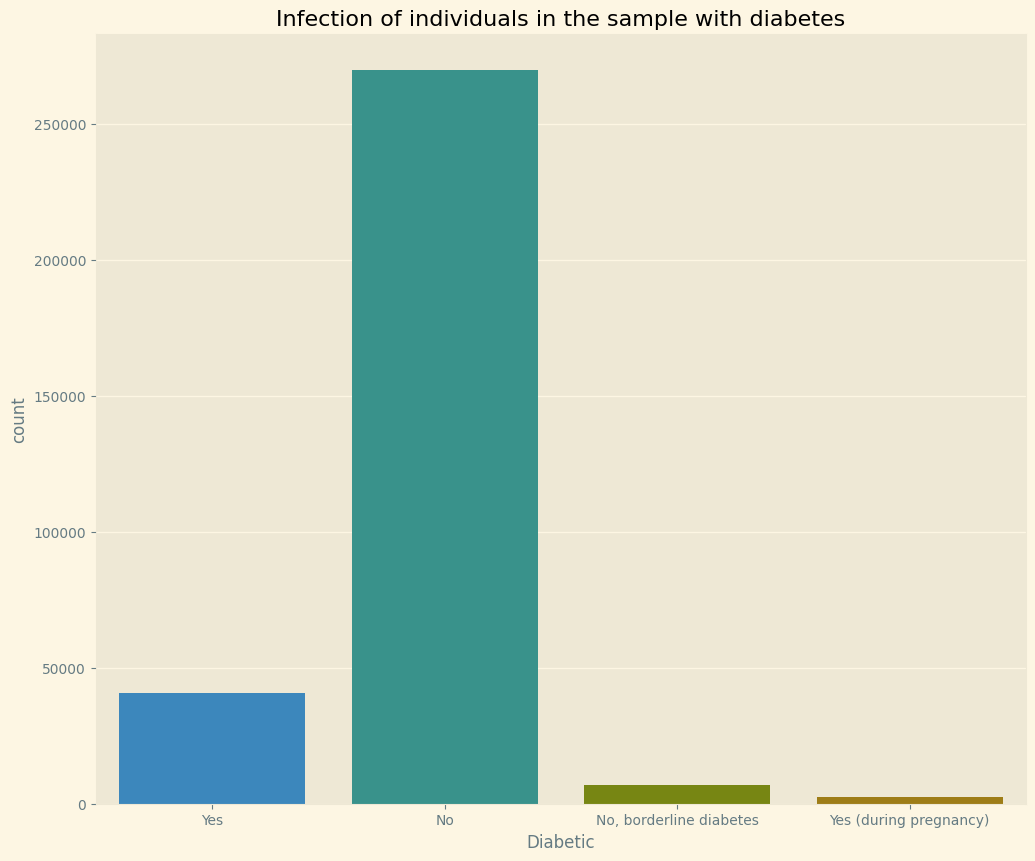

In [39]:
def drawPlots():
    plt.style.use('Solarize_Light2')
    plt.figure(figsize=(12, 10))
    plt.title('Heart disease patients vs. non-heart disease patients in dataset')
    sns.countplot(x='HeartDisease', data=HeartDataFrame)
    plt.show()

    plt.figure(figsize=(12, 10))
    plt.title('Smoking persons vs. non-Smoking persons dataset')
    sns.countplot(x='Smoking', data=HeartDataFrame)
    plt.show()

    plt.figure(figsize=(12, 10))
    plt.title('Alcohol Drinking persons vs. non-AlcoholDrinking persons dataset')
    sns.countplot(x='AlcoholDrinking', data=HeartDataFrame)
    plt.show()

    plt.figure(figsize=(12, 10))
    plt.title('Male vs. Female persons dataset')
    sns.countplot(x='Sex', data=HeartDataFrame)
    plt.show()

    plt.figure(figsize=(12, 10))
    plt.title('Race color for persons in dataset')
    sns.countplot(x='Race', data=HeartDataFrame)
    plt.show()

    plt.figure(figsize=(12, 10))
    plt.title('General Health fo persons in dataset')
    sns.countplot(x='GenHealth', data=HeartDataFrame)
    plt.show()

    
    plt.figure(figsize=(12, 10))
    plt.title('Infection of individuals in the sample with diabetes')
    sns.countplot(x='Diabetic', data=HeartDataFrame)
    plt.show()
drawPlots()